In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Import requests library
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-56.000, high=80.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

741

In [6]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval.     ")
print('------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + '&q=' + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval.     
------------------------------
Processing Record 1 of Set 1 | mazsalaca
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | alyangula
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | topchikha
Processing Record 10 of Set 1 | heihe
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mastic beach
Processing Record 15 of Set 1 | jinchang
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | diffa
Processing Record 21 of Set 1 | chart

Processing Record 38 of Set 4 | kollam
Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | taoudenni
Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | barroualie
City not found. Skipping...
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | nyagan
Processing Record 45 of Set 4 | kapaa
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | araouane
Processing Record 48 of Set 4 | bilibino
Processing Record 49 of Set 4 | ploemeur
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | ahvaz
Processing Record 2 of Set 5 | umm kaddadah
Processing Record 3 of Set 5 | dillon
Processing Record 4 of Set 5 | port arthur
Processing Record 5 of Set 5 | tawnat
City not found. Skipping...
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | banjar
Processing Record 8 of Set 5 | sur
Processing Record 9 of Set 5 | coih

Processing Record 26 of Set 8 | abalak
Processing Record 27 of Set 8 | ostrovnoy
Processing Record 28 of Set 8 | chekhov
Processing Record 29 of Set 8 | escanaba
Processing Record 30 of Set 8 | coalinga
Processing Record 31 of Set 8 | bababe
City not found. Skipping...
Processing Record 32 of Set 8 | norman wells
Processing Record 33 of Set 8 | west fargo
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | westport
Processing Record 36 of Set 8 | choma
Processing Record 37 of Set 8 | macusani
Processing Record 38 of Set 8 | cidreira
Processing Record 39 of Set 8 | kaitangata
Processing Record 40 of Set 8 | luderitz
Processing Record 41 of Set 8 | mapimi
Processing Record 42 of Set 8 | los llanos de aridane
Processing Record 43 of Set 8 | sitka
Processing Record 44 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 45 of Set 8 | luwuk
Processing Record 46 of Set 8 | dongning
Processing Record 47 of Set 8 | pangkalanbuun
Processing Record 48 of Set 

City not found. Skipping...
Processing Record 15 of Set 12 | orlik
Processing Record 16 of Set 12 | sabha
Processing Record 17 of Set 12 | lolua
City not found. Skipping...
Processing Record 18 of Set 12 | hanyang
Processing Record 19 of Set 12 | naples park
Processing Record 20 of Set 12 | callaguip
Processing Record 21 of Set 12 | krasnoarmeysk
Processing Record 22 of Set 12 | fairbanks
Processing Record 23 of Set 12 | port-gentil
Processing Record 24 of Set 12 | otse
Processing Record 25 of Set 12 | bonavista
Processing Record 26 of Set 12 | dhemaji
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | sobolevo
Processing Record 29 of Set 12 | utiroa
City not found. Skipping...
Processing Record 30 of Set 12 | key west
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | ola
Processing Record 33 of Set 12 | daxian
City not found. Skipping...
Processing Record 34 of Set 12 | maceio
Processing Record 35 of Set 12 | monrovia
Processing Record 36

In [7]:
len(city_data)

682

In [8]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mazsalaca,57.86,25.05,37.99,96,100,5.01,LV,2020-12-24 01:06:25
1,Vaini,-21.20,-175.20,84.20,79,40,16.11,TO,2020-12-24 01:06:25
2,San Cristobal,7.77,-72.22,66.25,93,100,1.99,VE,2020-12-24 01:06:26
3,Alyangula,-13.85,136.42,86.00,70,75,6.93,AU,2020-12-24 01:06:26
4,Port Elizabeth,-33.92,25.57,66.20,88,40,20.80,ZA,2020-12-24 01:06:26
5,Alice Springs,-23.70,133.88,60.80,93,90,12.75,AU,2020-12-24 01:03:12
6,Topchikha,52.82,83.12,15.80,85,75,17.90,RU,2020-12-24 01:06:27
7,Heihe,50.24,127.49,-9.40,76,0,2.24,CN,2020-12-24 01:06:27
8,Butaritari,3.07,172.79,81.09,77,68,16.24,KI,2020-12-24 01:06:28
9,Tasiilaq,65.61,-37.64,30.20,92,100,34.45,GL,2020-12-24 01:06:28


In [9]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mazsalaca,LV,2020-12-24 01:06:25,57.86,25.05,37.99,96,100,5.01
1,Vaini,TO,2020-12-24 01:06:25,-21.20,-175.20,84.20,79,40,16.11
2,San Cristobal,VE,2020-12-24 01:06:26,7.77,-72.22,66.25,93,100,1.99
3,Alyangula,AU,2020-12-24 01:06:26,-13.85,136.42,86.00,70,75,6.93
4,Port Elizabeth,ZA,2020-12-24 01:06:26,-33.92,25.57,66.20,88,40,20.80
5,Alice Springs,AU,2020-12-24 01:03:12,-23.70,133.88,60.80,93,90,12.75
6,Topchikha,RU,2020-12-24 01:06:27,52.82,83.12,15.80,85,75,17.90
7,Heihe,CN,2020-12-24 01:06:27,50.24,127.49,-9.40,76,0,2.24
8,Butaritari,KI,2020-12-24 01:06:28,3.07,172.79,81.09,77,68,16.24
9,Tasiilaq,GL,2020-12-24 01:06:28,65.61,-37.64,30.20,92,100,34.45


In [10]:
# Create output CSV
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Import time module
import time
# Get today's date in seconds
today = time.time()
today

1608772195.357352

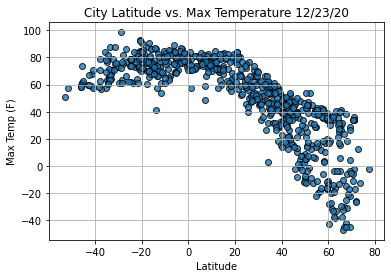

In [12]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

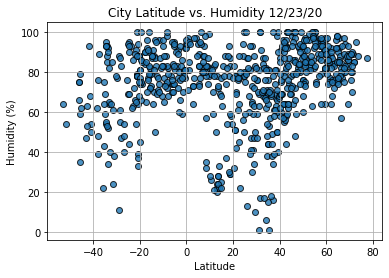

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black",
            linewidths=1, 
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

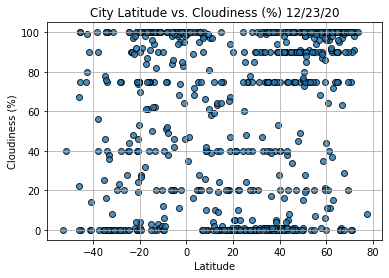

In [14]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(lats, cloudiness,
            edgecolor='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label='Cities')

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

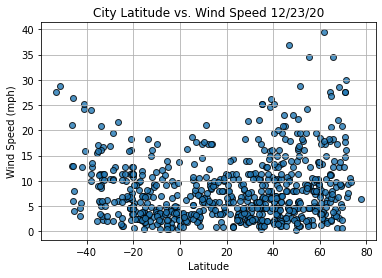

In [15]:
# Build the scatter plot for lat. vs. wind speed
plt.scatter(lats, wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                       Lompoc
Country                        US
Date          2020-12-24 01:02:33
Lat                         34.64
Lng                       -120.46
Max Temp                     57.2
Humidity                       71
Cloudiness                      1
Wind Speed                   8.05
Name: 13, dtype: object

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mazsalaca,LV,2020-12-24 01:06:25,57.86,25.05,37.99,96,100,5.01
2,San Cristobal,VE,2020-12-24 01:06:26,7.77,-72.22,66.25,93,100,1.99
6,Topchikha,RU,2020-12-24 01:06:27,52.82,83.12,15.80,85,75,17.90
7,Heihe,CN,2020-12-24 01:06:27,50.24,127.49,-9.40,76,0,2.24
8,Butaritari,KI,2020-12-24 01:06:28,3.07,172.79,81.09,77,68,16.24


In [20]:
# Create dataframes for Northern and Southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [21]:
len(northern_hemi_df)

472

In [22]:
len(southern_hemi_df)

210

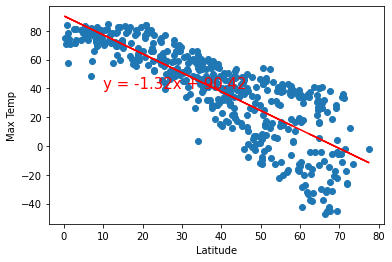

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature',
                       'Max Temp',(10,40))